In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## there are no null values in this dataset

In [7]:
df.duplicated().sum()

np.int64(0)

## no duplicates are present either

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("Number of unique gender values: ", df['gender'].unique())
print("Number of unique race_ethnicity values: ", df['race_ethnicity'].unique())

Number of unique gender values:  ['female' 'male']
Number of unique race_ethnicity values:  ['group B' 'group C' 'group A' 'group D' 'group E']


In [14]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [15]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
full_reading = df[df['reading_score'] == 100]['gender'].count()
full_writing = df[df['writing_score'] == 100]['gender'].count()
print(full_reading)
print(full_writing)

17
14


In [21]:
lower_bound_reading = df[df['reading_score'] <= 20]['gender'].count()
lower_bound_writing = df[df['writing_score'] <= 20]['gender'].count()

In [22]:
lower_bound_reading

np.int64(1)

In [23]:
lower_bound_writing

np.int64(3)

## univariate analysis

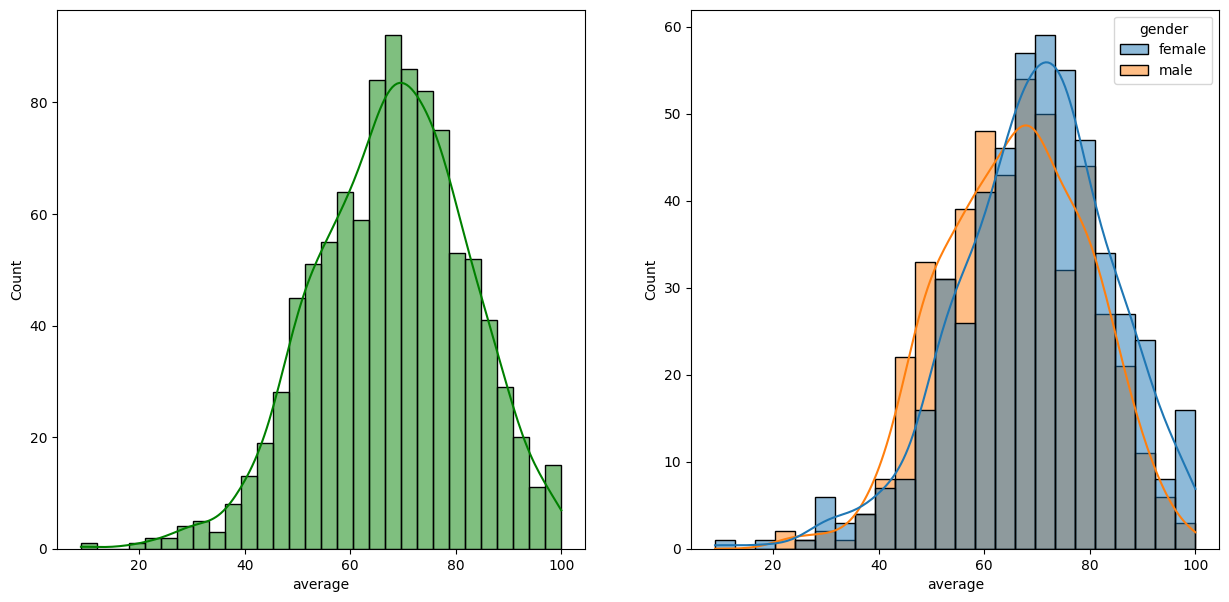

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

## insights
female students are performing better than the male students currently

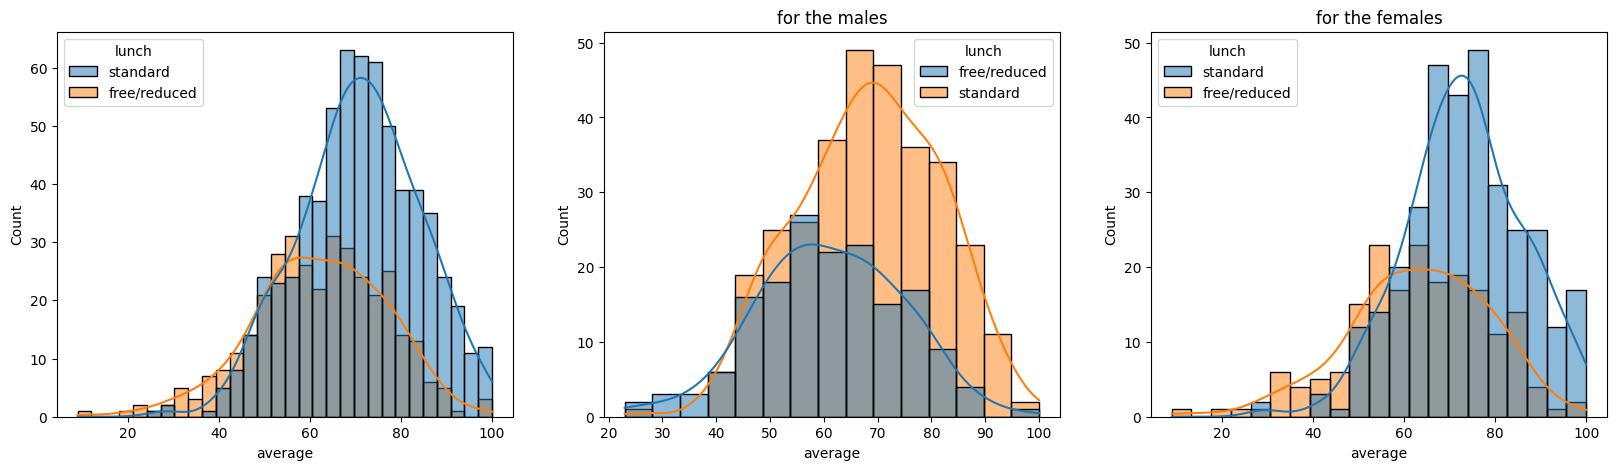

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g', hue='lunch')
plt.subplot(132)
plt.title("for the males")
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde=True,hue='lunch')
plt.subplot(133)
plt.title("for the females")
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='lunch')
plt.show()

# standard lunch helps students to perform better, regardless of gender

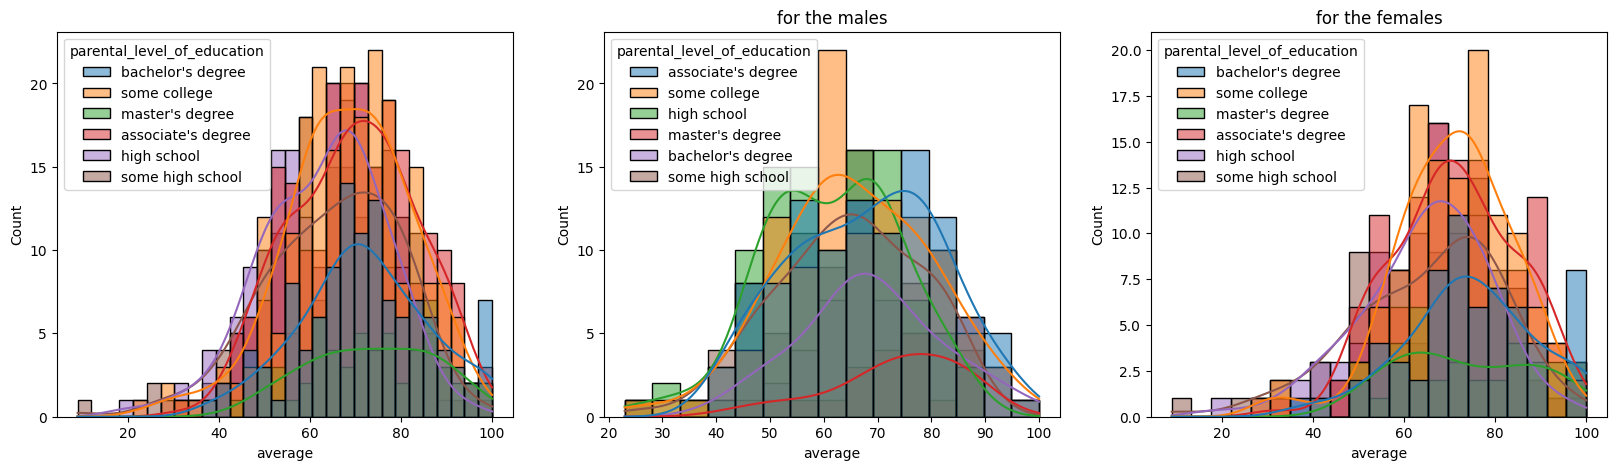

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g', hue='parental_level_of_education')
plt.subplot(132)
plt.title("for the males")
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
plt.title("for the females")
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

there is not a big impact of the parent's level of education on the impact of the scores of students

there is some changes with certain educations like associate's degree and master's degree which has some correlation with students performing better 